District 57 Toastmasters - Clus Restructuring Project

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/Club_Performance_2025.csv')
df.head(5)

,District,Division,Area,Club Number,Club Name,Club Status,Mem. Base,Active Members,Goals Met,Level 1s,...,"Level 4s, Level 5s, or DTM award","Add. Level 4s, Level 5s, or DTM award",New Members,Add. New Members,Off. Trained Round 1,Off. Trained Round 2,Mem. dues on time Oct,Mem. dues on time Apr,Off. List On Time,Club Distinguished Status
0,57,A,1.0,207.0,Bayfair Toastmasters Club,Active,13.0,8.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
1,57,A,1.0,452.0,San Leandro Toastmasters Club,Active,23.0,16.0,3.0,3.0,...,0.0,0.0,4.0,0.0,3.0,4.0,1.0,1.0,1.0,NaN
2,57,A,1.0,961.0,Castro Valley Toastmasters Club #961,Active,9.0,10.0,7.0,3.0,...,1.0,1.0,4.0,1.0,6.0,4.0,1.0,1.0,2.0,NaN
3,57,A,1.0,3442284.0,Stagecoach Warriors,Active,25.0,18.0,6.0,3.0,...,1.0,0.0,4.0,10.0,7.0,4.0,1.0,1.0,1.0,NaN
4,57,A,1.0,7881014.0,Stagecoach Speakers Transformers,Active,13.0,10.0,5.0,1.0,...,1.0,3.0,4.0,0.0,3.0,0.0,1.0,0.0,0.0,NaN


In [ ]:
df['Club Distinguished Status'].value_counts()

,count
Club Distinguished Status,
D,11
P,11
S,5


In [ ]:
df['Club Distinguished Status'].isna().sum()

np.int64(91)

In [ ]:
df.fillna({'Club Distinguished Status':'N'}, inplace=True)
df['Club Distinguished Status'].value_counts()

,count
Club Distinguished Status,
N,91
D,11
P,11
S,5


In [ ]:
df.isna().sum()
df.dropna(inplace=True, axis=0)
df.isna().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117 entries, 0 to 116
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   District                               117 non-null    object 
 1   Division                               117 non-null    object 
 2   Area                                   117 non-null    float64
 3   Club Number                            117 non-null    float64
 4   Club Name                              117 non-null    object 
 5   Club Status                            117 non-null    object 
 6   Mem. Base                              117 non-null    float64
 7   Active Members                         117 non-null    float64
 8   Goals Met                              117 non-null    float64
 9   Level 1s                               117 non-null    float64
 10  Level 2s                               117 non-null    float64
 11  Add. Level 

#Get Club Addresses
#####Read file with club city. Using bs4 to scrape addresses from each club web page.

In [ ]:
df1 = pd.read_csv('/content/D57_Club_City - Sheet1.csv')
df1.head(3)

,Club Number,Name,Division,Area,City
0,8597,A Cut Above Club,A,13,Hayward
1,1940417,Alameda Tongue Twisters,B,22,Alameda
2,2452,Amador Valley Toastmasters Club,F,28,Pleasanton


In [ ]:
import requests
from bs4 import BeautifulSoup

# URL of the page
#url = "https://d57tm.org/club/bayfair-toastmasters-club/"

def get_address(url):

  # Fetch the page content
  response = requests.get(url)
  soup = BeautifulSoup(response.text, "html.parser")

  # Extract address (modify based on actual HTML structure)
  address_divs = soup.find_all("div", class_="brxe-text-basic", id="brxe-qjarga")  # Adjust class if needed
  address = " ".join([div.get_text(strip=True).replace('Address: ', '') for div in address_divs[:2]])

  address_divs_zip = soup.find_all("div", class_="brxe-text-basic", id="brxe-nrlhhc")  # Adjust class if needed
  zip = " ".join([div.get_text(strip=True) for div in address_divs_zip[:2]])  # First two divs contain address

  return address +","+ zip

"""url1 = "https://d57tm.org/club/Windmaster-Club/"
address = get_address(url1)
print(address)
  #print(f"Extracted Address: {address}, {zip}")
  """

'url1 = "https://d57tm.org/club/Windmaster-Club/"\naddress = get_address(url1)\nprint(address)\n  #print(f"Extracted Address: {address}, {zip}")\n  '

In [ ]:
#Get club names from df
#Replace space with '-' to create url
clubNms = df1['Name'].str.replace(' ','-')
clubNms

,Name
0,A-Cut-Above-Club
1,Alameda-Tongue-Twisters
2,Amador-Valley-Toastmasters-Club
3,Andeesheh-Toastmasters-Club
4,Argonauts
...,...
101,Walnut-Creek-Toastmasters-Club
102,Warehouse-Toastmasters
103,Watergate-Toastmasters
104,Windmaster-Club


In [ ]:
#Call function get_address(url)
clubAddrs = []
for club in clubNms:
  url = f"https://d57tm.org/club/{club}/"
  address = get_address(url)
  clubAddrs.append(address)
print(clubAddrs)


['25580 Campus Drive,Hayward, CA 94542', 'Acapulco restaurant , 2100 Lincoln Ave,Alameda, CA 94501', '777 Peters Ave.,Pleasanton, CA 94588-3304', '1780 Arrowhead Drive,Oakland, CA 94611', '2000 Clayton Rd,Concord, CA 94520-2400', '15555 E 14th St,San Leandro, CA 94578-1900', 'Address:,Berkeley, CA', 'MS TEAM Meeting,Hercules, CA 94547-1833', '601 1St St.,Benicia, CA 94510-3074', 'Baywood Ct, Retirement Residence,Castro Valley, CA 94546-6959', '3216 Cheryl Circle,Pleasanton, CA 94588', '100 Chevron Way,Richmond, CA 94801', '43484 Boscell Rd,Fremont, CA 94538', 'Washington Blvd(Send email to club),Fremont, CA 94538', '126 N. Cloverdale Blvd.,Cloverdale, CA 95425', 'Online -- email us to get the link,Alameda, CA 94501', '2540 East Street,Concord, CA 94520', 'Virtual,Pleasanton, CA 94566', '4501, Deer Valley Rd., Bldg 2  (South Building),Antioch, CA 94531', '117E Town and Country Drive, Suite E,Danville, CA 94526', 'Virtual Meeting,San Ramon, CA 94582-2906', '160 Spear St 15th floor,San Fr

In [ ]:
df_clubs = pd.DataFrame()
df_clubs['Club Number'] = df1['Club Number']
df_clubs['Club Name'] = pd.DataFrame(clubNms)
df_clubs['Address'] = clubAddrs
df_clubs.head(3)



,Club Number,Club Name,Address
0,8597,A-Cut-Above-Club,"25580 Campus Drive,Hayward, CA 94542"
1,1940417,Alameda-Tongue-Twisters,"Acapulco restaurant , 2100 Lincoln Ave,Alameda..."
2,2452,Amador-Valley-Toastmasters-Club,"777 Peters Ave.,Pleasanton, CA 94588-3304"


In [ ]:
df_clubs.head(4)
df_clubs['Club Name'] = df_clubs['Club Name'].str.replace('-',' ')
df_clubs['Street'] = df_clubs['Address'].apply(lambda x: x.split(',')[0] if len(x.split(',')) <= 3  else x.split(',')[1] )
#df_clubs['City'] = df_clubs['Address'].apply(lambda x:  x.split(',')[1] if len(x.split(',')) > 0 else None)
df_clubs.head(4)


,Club Number,Club Name,Address,Street
0,8597,A Cut Above Club,"25580 Campus Drive,Hayward, CA 94542",25580 Campus Drive
1,1940417,Alameda Tongue Twisters,"Acapulco restaurant , 2100 Lincoln Ave,Alameda...",2100 Lincoln Ave
2,2452,Amador Valley Toastmasters Club,"777 Peters Ave.,Pleasanton, CA 94588-3304",777 Peters Ave.
3,1150549,Andeesheh Toastmasters Club,"1780 Arrowhead Drive,Oakland, CA 94611",1780 Arrowhead Drive


In [ ]:
df_clubs['City'] = df_clubs['Address'].apply(lambda x:  x.split(',')[1] if len(x.split(',')) <=3 else x.split(',')[2])

In [ ]:
df_clubs['State'] = 'CA'
df_clubs.head(4)

,Club Number,Club Name,Address,Street,City,State
0,8597,A Cut Above Club,"25580 Campus Drive,Hayward, CA 94542",25580 Campus Drive,Hayward,CA
1,1940417,Alameda Tongue Twisters,"Acapulco restaurant , 2100 Lincoln Ave,Alameda...",2100 Lincoln Ave,Alameda,CA
2,2452,Amador Valley Toastmasters Club,"777 Peters Ave.,Pleasanton, CA 94588-3304",777 Peters Ave.,Pleasanton,CA
3,1150549,Andeesheh Toastmasters Club,"1780 Arrowhead Drive,Oakland, CA 94611",1780 Arrowhead Drive,Oakland,CA


In [ ]:
df_clubs['Zip'] = df_clubs['Address'].apply(lambda x:  x.split(' ')[-1] if len(x.split(' ')) > 1 else None)

In [ ]:
df_clubs['Active Members'] = df['Active Members']


In [ ]:
df_clubs.head(4)

,Club Number,Club Name,Address,Street,City,State,Zip,Latitude,Longitude,Cluster,Labels,Active Members
0,8597,A Cut Above Club,"25580 Campus Drive,Hayward, CA 94542",25580 Campus Drive,Hayward,CA,94542,37.662713,-122.058351,10,5,8.0
1,1940417,Alameda Tongue Twisters,"Acapulco restaurant , 2100 Lincoln Ave,Alameda...",2100 Lincoln Ave,Alameda,CA,94501,37.769485,-122.248176,7,5,16.0
2,2452,Amador Valley Toastmasters Club,"777 Peters Ave.,Pleasanton, CA 94588-3304",777 Peters Ave.,Pleasanton,CA,94588,37.663765,-121.876070,8,3,10.0
3,1150549,Andeesheh Toastmasters Club,"1780 Arrowhead Drive,Oakland, CA 94611",1780 Arrowhead Drive,Oakland,CA,94611,37.838785,-122.194735,7,5,18.0


In [ ]:
from geopy.geocoders import Nominatim

# Initialize Nominatim geocoder
geolocator = Nominatim(user_agent="my_app")

# Example ZIP Code
zip_code = "777 Peters Ave.,Pleasanton, CA 94588-3304" #"94578"

# Get location details
location = geolocator.geocode(zip_code)

# Extract latitude & longitude
if location:
    print(f"Latitude: {location.latitude}, Longitude: {location.longitude}")
else:
    print("Location not found")

Latitude: 37.6637655, Longitude: -121.8760704


In [ ]:
df_clubs['Zip'] = df_clubs['Zip'].apply(lambda x: x.split('-')[0] if '-' in x else x)
df_clubs.head(30)

,Club Number,Club Name,Address,Street,City,State,Zip
0,8597,A Cut Above Club,"25580 Campus Drive,Hayward, CA 94542",25580 Campus Drive,Hayward,CA,94542
1,1940417,Alameda Tongue Twisters,"Acapulco restaurant , 2100 Lincoln Ave,Alameda...",2100 Lincoln Ave,Alameda,CA,94501
2,2452,Amador Valley Toastmasters Club,"777 Peters Ave.,Pleasanton, CA 94588-3304",777 Peters Ave.,Pleasanton,CA,94588
3,1150549,Andeesheh Toastmasters Club,"1780 Arrowhead Drive,Oakland, CA 94611",1780 Arrowhead Drive,Oakland,CA,94611
4,1809,Argonauts,"2000 Clayton Rd,Concord, CA 94520-2400",2000 Clayton Rd,Concord,CA,94520
5,207,Bayfair Toastmasters Club,"15555 E 14th St,San Leandro, CA 94578-1900",15555 E 14th St,San Leandro,CA,94578
6,4976,Berkeley Bay,"Address:,Berkeley, CA",Address:,Berkeley,CA,CA
7,791318,Bioradical Toastmasters Club,"MS TEAM Meeting,Hercules, CA 94547-1833",MS TEAM Meeting,Hercules,CA,94547
8,2080,Capitol Speakers Toastmasters Club,"601 1St St.,Benicia, CA 94510-3074",601 1St St.,Benicia,CA,94510
9,961,Castro Valley Toastmasters Club,"Baywood Ct, Retirement Residence,Castro Valley...",Retirement Residence,Castro Valley,CA,94546


In [ ]:
#Function to get long, lat
from geopy.geocoders import Nominatim

# Initialize Nominatim geocoder
geolocator = Nominatim(user_agent="my app")

def get_lat_lon(address):
    location = geolocator.geocode(address, timeout=10)
    return (location.latitude, location.longitude) if location else (None, None)

latlng = []
addrs = []
addrs= df_clubs[['Street', 'City', 'State','Zip']].apply(lambda row: list(row), axis=1)
for item in addrs:
  latlng.append(get_lat_lon(item))



In [ ]:
addrs = []
addrs= df_clubs[['Street', 'City', 'State','Zip']].apply(lambda row: list(row), axis=1)
print(addrs)

0        [25580 Campus Drive, Hayward, CA, 94542]
1         [ 2100 Lincoln Ave, Alameda, CA, 94501]
2        [777 Peters Ave., Pleasanton, CA, 94588]
3      [1780 Arrowhead Drive, Oakland, CA, 94611]
4           [2000 Clayton Rd, Concord, CA, 94520]
                          ...                    
101       [1786 2nd Ave, Walnut Creek, CA, 94597]
102             [416 26th St, Oakland, CA, 94612]
103           [ Emeryville,  CA 94608, CA, 94608]
104        [2228 Pacific Ave, Alameda, CA, 94501]
105        [2450 East Street, Concord, CA, 94521]
Length: 106, dtype: object


In [ ]:

df_clubs['Latitude'] = [item[0] for item in latlng]
df_clubs['Longitude'] = [item[1] for item in latlng]
df_clubs.head(10)

,Club Number,Club Name,Address,Street,City,State,Zip,Latitude,Longitude,Cluster,Labels,Active Members
0,8597,A Cut Above Club,"25580 Campus Drive,Hayward, CA 94542",25580 Campus Drive,Hayward,CA,94542,37.662713,-122.058351,10,5,8.0
1,1940417,Alameda Tongue Twisters,"Acapulco restaurant , 2100 Lincoln Ave,Alameda...",2100 Lincoln Ave,Alameda,CA,94501,37.769485,-122.248176,7,5,16.0
2,2452,Amador Valley Toastmasters Club,"777 Peters Ave.,Pleasanton, CA 94588-3304",777 Peters Ave.,Pleasanton,CA,94588,37.663765,-121.876070,8,3,10.0
3,1150549,Andeesheh Toastmasters Club,"1780 Arrowhead Drive,Oakland, CA 94611",1780 Arrowhead Drive,Oakland,CA,94611,37.838785,-122.194735,7,5,18.0
4,1809,Argonauts,"2000 Clayton Rd,Concord, CA 94520-2400",2000 Clayton Rd,Concord,CA,94520,37.974234,-122.033599,16,4,10.0
5,207,Bayfair Toastmasters Club,"15555 E 14th St,San Leandro, CA 94578-1900",15555 E 14th St,San Leandro,CA,94578,37.700434,-122.126548,10,5,14.0
6,4976,Berkeley Bay,"Address:,Berkeley, CA",Address:,Berkeley,CA,CA,NaN,NaN,19,-1,8.0
7,791318,Bioradical Toastmasters Club,"MS TEAM Meeting,Hercules, CA 94547-1833",MS TEAM Meeting,Hercules,CA,94547,NaN,NaN,1,0,19.0
8,2080,Capitol Speakers Toastmasters Club,"601 1St St.,Benicia, CA 94510-3074",601 1St St.,Benicia,CA,94510,38.049166,-122.159263,4,-1,9.0
9,961,Castro Valley Toastmasters Club,"Baywood Ct, Retirement Residence,Castro Valley...",Retirement Residence,Castro Valley,CA,94546,NaN,NaN,23,-1,20.0


In [ ]:
latlng_zip = []
zips = []
zips = df_clubs['Zip'] #.apply(lambda row: list(row) if (df_clubs['Latitude'] | df_clubs['Longitude'] == None) else row, axis=1)
for item in zips:
  latlng_zip.append(get_lat_lon(item))
print(latlng_zip)

[(48.5015345, 13.1409848), (48.5804413, 13.0655606), (37.6926624, -121.8841254), (58.6381051, 23.0179796), (48.6994685, 2.5449754), (37.7037399, -122.1232381), (61.0666922, -107.991707), (48.7205757, 13.1647165), (48.7878622, 2.5837769), (48.2875339, 38.8613841), (37.6926624, -121.8841254), (48.0713663, 39.6516728), (48.7150054, 13.3200159), (48.7150054, 13.3200159), (38.785808, -123.0060732), (48.5804413, 13.0655606), (48.6994685, 2.5449754), (48.9055545, 13.3839431), (37.9663674, -121.7633495), (48.8579139, 12.918282), (37.7634371, -121.9197563), (55.6900732, 21.1857343), (37.9729128, -122.072411), (37.6926624, -121.8841254), (55.6256819, 21.2305832), (37.8800518, -122.0738305), (37.8025001, -122.2784268), (37.8335102, -122.2640102), (37.9022364, -122.1119005), (58.6336099, 23.428), (37.7449859, -122.238247), (48.8695077, 12.871736), (37.5884132, -122.0566569), (38.4688075, -122.743981), (48.862151, 13.5197583), (37.9044157, -122.1139198), (48.9273835, 13.4106564), (37.9133558, -122.

In [ ]:

df_zip_lat = pd.DataFrame({'Zip': zips, 'Latitude': [lat for lat, lon in latlng_zip], 'Longitude': [lon for lat, lon in latlng_zip]})
df_zip_lat

,Zip,Latitude,Longitude
0,94542,48.501534,13.140985
1,94501,48.580441,13.065561
2,94588,37.692662,-121.884125
3,94611,58.638105,23.017980
4,94520,48.699469,2.544975
5,94578,37.703740,-122.123238
6,CA,61.066692,-107.991707
7,94547,48.720576,13.164717
8,94510,48.787862,2.583777
9,94546,48.287534,38.861384


In [ ]:
df_clubs = df_clubs.fillna(df_zip_lat)
df_clubs.head(10)

,Club Number,Club Name,Address,Street,City,State,Zip,Latitude,Longitude,Cluster,Labels,Active Members
0,8597,A Cut Above Club,"25580 Campus Drive,Hayward, CA 94542",25580 Campus Drive,Hayward,CA,94542,37.662713,-122.058351,10,5,8.0
1,1940417,Alameda Tongue Twisters,"Acapulco restaurant , 2100 Lincoln Ave,Alameda...",2100 Lincoln Ave,Alameda,CA,94501,37.769485,-122.248176,7,5,16.0
2,2452,Amador Valley Toastmasters Club,"777 Peters Ave.,Pleasanton, CA 94588-3304",777 Peters Ave.,Pleasanton,CA,94588,37.663765,-121.876070,8,3,10.0
3,1150549,Andeesheh Toastmasters Club,"1780 Arrowhead Drive,Oakland, CA 94611",1780 Arrowhead Drive,Oakland,CA,94611,37.838785,-122.194735,7,5,18.0
4,1809,Argonauts,"2000 Clayton Rd,Concord, CA 94520-2400",2000 Clayton Rd,Concord,CA,94520,37.974234,-122.033599,16,4,10.0
5,207,Bayfair Toastmasters Club,"15555 E 14th St,San Leandro, CA 94578-1900",15555 E 14th St,San Leandro,CA,94578,37.700434,-122.126548,10,5,14.0
6,4976,Berkeley Bay,"Address:,Berkeley, CA",Address:,Berkeley,CA,CA,61.066692,-107.991707,19,-1,8.0
7,791318,Bioradical Toastmasters Club,"MS TEAM Meeting,Hercules, CA 94547-1833",MS TEAM Meeting,Hercules,CA,94547,48.720576,13.164717,1,0,19.0
8,2080,Capitol Speakers Toastmasters Club,"601 1St St.,Benicia, CA 94510-3074",601 1St St.,Benicia,CA,94510,38.049166,-122.159263,4,-1,9.0
9,961,Castro Valley Toastmasters Club,"Baywood Ct, Retirement Residence,Castro Valley...",Retirement Residence,Castro Valley,CA,94546,48.287534,38.861384,23,-1,20.0


In [ ]:
pd.set_option('display.max_rows', None)
df_clubs

,Club Number,Club Name,Address,Street,City,State,Zip,Latitude,Longitude
0,8597,A Cut Above Club,"25580 Campus Drive,Hayward, CA 94542",25580 Campus Drive,Hayward,CA,94542,37.662713,-122.058351
1,1940417,Alameda Tongue Twisters,"Acapulco restaurant , 2100 Lincoln Ave,Alameda...",2100 Lincoln Ave,Alameda,CA,94501,37.769485,-122.248176
2,2452,Amador Valley Toastmasters Club,"777 Peters Ave.,Pleasanton, CA 94588-3304",777 Peters Ave.,Pleasanton,CA,94588,37.663765,-121.876070
3,1150549,Andeesheh Toastmasters Club,"1780 Arrowhead Drive,Oakland, CA 94611",1780 Arrowhead Drive,Oakland,CA,94611,37.838785,-122.194735
4,1809,Argonauts,"2000 Clayton Rd,Concord, CA 94520-2400",2000 Clayton Rd,Concord,CA,94520,37.974234,-122.033599
5,207,Bayfair Toastmasters Club,"15555 E 14th St,San Leandro, CA 94578-1900",15555 E 14th St,San Leandro,CA,94578,37.700434,-122.126548
6,4976,Berkeley Bay,"Address:,Berkeley, CA",Address:,Berkeley,CA,CA,61.066692,-107.991707
7,791318,Bioradical Toastmasters Club,"MS TEAM Meeting,Hercules, CA 94547-1833",MS TEAM Meeting,Hercules,CA,94547,48.720576,13.164717
8,2080,Capitol Speakers Toastmasters Club,"601 1St St.,Benicia, CA 94510-3074",601 1St St.,Benicia,CA,94510,38.049166,-122.159263
9,961,Castro Valley Toastmasters Club,"Baywood Ct, Retirement Residence,Castro Valley...",Retirement Residence,Castro Valley,CA,94546,48.287534,38.861384


In [ ]:
df_clubs.to_csv('/content/df_clubs.csv')

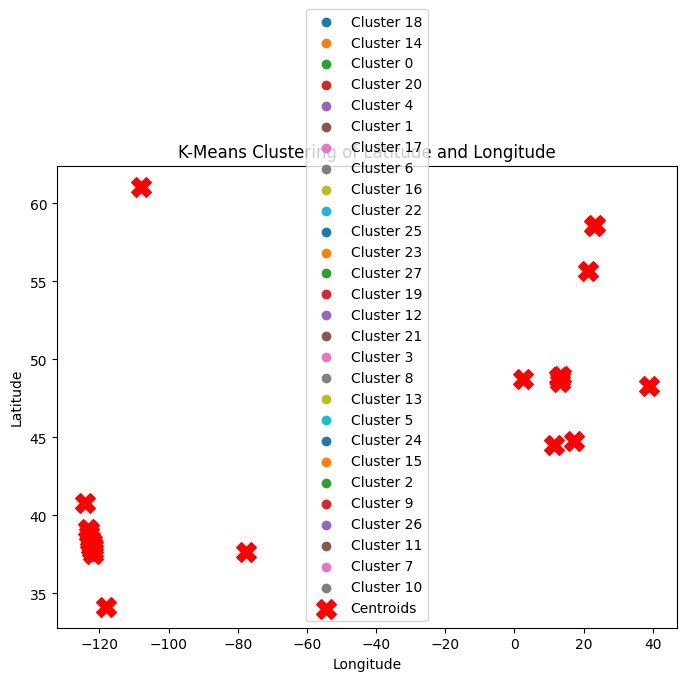

In [ ]:
#Using K-Means Clustering to group clubs with 4 clubs in each based on proximity
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Prepare the data for clustering
coordinates = df_clubs[['Latitude', 'Longitude']]

# Apply K-Means clustering
kmeans = KMeans(n_clusters=28, random_state=42)  # Adjust n_clusters as needed
df_clubs['Cluster'] = kmeans.fit_predict(coordinates)

# Visualize the clusters
plt.figure(figsize=(8, 6))
for cluster in df_clubs['Cluster'].unique():
    cluster_data = df_clubs[df_clubs['Cluster'] == cluster]
    plt.scatter(cluster_data['Longitude'], cluster_data['Latitude'], label=f'Cluster {cluster}')

plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0],
            s=200, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering of Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()



In [ ]:
!pip install --upgrade numpy scikit-learn scikit-learn-extra


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 69.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.5 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.5 which is incompatible.


In [ ]:
import numpy as np
import pandas as pd
from sklearn_extra.cluster import KMedoids

# Sample club locations (latitude, longitude)
"""club_locations = np.array([
    [37.77, -122.42], [37.75, -122.45], [37.80, -122.40],
    [37.78, -122.43], [37.76, -122.44], [37.74, -122.41],
    [37.79, -122.39], [37.73, -122.42], [37.81, -122.46],
    [37.82, -122.41], [37.85, -122.47], [37.86, -122.43]
])"""

club_locations = df_clubs[['Latitude', 'Longitude']]
# Number of clusters required (each with 4 clubs)
num_clusters = len(df_clubs) // 4
print(num_clusters)
# Apply K-Medoids Clustering
kmedoids = KMedoids(n_clusters=num_clusters, random_state=42)
clusters = kmedoids.fit_predict(club_locations)

# Create DataFrame for clusters
df_cluster = pd.DataFrame(df_clubs, columns=['Latitude', 'Longitude'])
df_cluster['Cluster'] = clusters

print(df_cluster)

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering

# Sample club locations (latitude, longitude)
"""club_locations = np.array([
    [37.77, -122.42], [37.75, -122.45], [37.80, -122.40],
    [37.78, -122.43], [37.76, -122.44], [37.74, -122.41],
    [37.79, -122.39], [37.73, -122.42], [37.81, -122.46],
    [37.82, -122.41], [37.85, -122.47], [37.86, -122.43]
])
"""

club_locations = df_clubs[['Latitude', 'Longitude']]
# Number of clusters (each should contain 4 clubs)
num_clusters = len(club_locations) // 4

# Apply Agglomerative Clustering
clustering = AgglomerativeClustering(n_clusters=num_clusters, linkage='complete')
labels = clustering.fit_predict(club_locations)

# Create DataFrame
df = pd.DataFrame(club_locations, columns=['Latitude', 'Longitude'])
df['Cluster'] = labels

# **Ensuring Equal Distribution Manually**
balanced_clusters = []
for i in range(num_clusters):
    clubs_in_cluster = df[df['Cluster'] == i]
    if len(clubs_in_cluster) > 4:
        extra_clubs = clubs_in_cluster.iloc[4:].index.tolist()
        df.loc[extra_clubs, 'Cluster'] = (i + 1) % num_clusters  # Reassign extra clubs

# Print Final Balanced Clusters
print(df)


      Latitude   Longitude  Cluster
0    37.662713 -122.058351       11
1    37.769485 -122.248176        6
2    37.663765 -121.876070        4
3    37.838785 -122.194735        6
4    37.974234 -122.033599       24
5    37.700434 -122.126548       11
6    61.066692 -107.991707       19
7    48.720576   13.164717        0
8    38.049166 -122.159263        1
9    48.287534   38.861384       23
10   37.680392 -121.897905        4
11   37.929373 -122.386329       10
12   37.501810 -121.974589        7
13   48.715005   13.320016        0
14   38.806523 -123.017484        3
15   48.580441   13.065561        0
16   37.983590 -122.033259       24
17   48.905555   13.383943       18
18   37.966367 -121.763350        8
19   48.857914   12.918282       16
20   37.763437 -121.919756        4
21   55.690073   21.185734       25
22   37.931061 -122.074403       24
23   37.693485 -121.906791        4
24   38.443437 -122.716458        2
25   37.880052 -122.073830       24
26   37.801239 -122.270850  

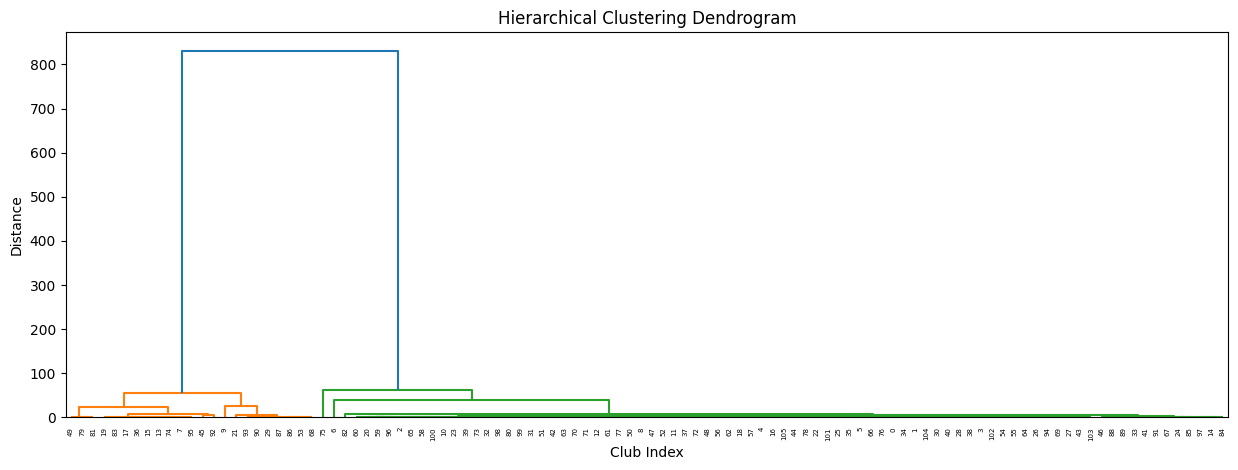

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
# Plot Dendrogram
Z = linkage(club_locations, method='ward')
plt.figure(figsize=(15, 5))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Club Index")
plt.ylabel("Distance")
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Sample club locations (latitude, longitude)
club_locations = np.array([
    [37.77, -122.42], [37.75, -122.45], [37.80, -122.40],
    [37.78, -122.43], [37.76, -122.44], [37.74, -122.41],
    [37.79, -122.39], [37.73, -122.42], [37.81, -122.46],
    [37.82, -122.41], [37.85, -122.47], [37.86, -122.43]
])

# Apply Agglomerative Clustering
clustering = AgglomerativeClustering(n_clusters=4, linkage='ward')
labels = clustering.fit_predict(club_locations)

# Create DataFrame
df = pd.DataFrame(club_locations, columns=['Latitude', 'Longitude'])
df['Cluster'] = labels

# Plot Dendrogram
Z = linkage(club_locations, method='ward')
plt.figure(figsize=(8, 5))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Club Index")
plt.ylabel("Distance")
plt.show()

print(df)

In [ ]:
df_clubs['Cluster'] = df['Cluster']

In [ ]:
df_clubs.head(5)

,Club Number,Club Name,Address,Street,City,State,Zip,Latitude,Longitude,Cluster
0,8597,A Cut Above Club,"25580 Campus Drive,Hayward, CA 94542",25580 Campus Drive,Hayward,CA,94542,37.662713,-122.058351,10
1,1940417,Alameda Tongue Twisters,"Acapulco restaurant , 2100 Lincoln Ave,Alameda...",2100 Lincoln Ave,Alameda,CA,94501,37.769485,-122.248176,7
2,2452,Amador Valley Toastmasters Club,"777 Peters Ave.,Pleasanton, CA 94588-3304",777 Peters Ave.,Pleasanton,CA,94588,37.663765,-121.876070,8
3,1150549,Andeesheh Toastmasters Club,"1780 Arrowhead Drive,Oakland, CA 94611",1780 Arrowhead Drive,Oakland,CA,94611,37.838785,-122.194735,7
4,1809,Argonauts,"2000 Clayton Rd,Concord, CA 94520-2400",2000 Clayton Rd,Concord,CA,94520,37.974234,-122.033599,16


from matplotlib import pyplot as plt
_df_0['Club Number'].plot(kind='hist', bins=20, title='Club Number')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Latitude'].plot(kind='hist', bins=20, title='Latitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Longitude'].plot(kind='hist', bins=20, title='Longitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Cluster'].plot(kind='hist', bins=20, title='Cluster')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Club Name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('Address').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('Street').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('City').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Club Number', y='Latitude', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='Latitude', y='Longitude', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='Longitude', y='Cluster', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Club Number'].plot(kind='line', figsize=(8, 4), title='Club Number')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['Latitude'].plot(kind='line', figsize=(8, 4), title='Latitude')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Longitude'].plot(kind='line', figsize=(8, 4), title='Longitude')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Cluster'].plot(kind='line', figsize=(8, 4), title='Cluster')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Address'].value_counts()
    for x_label, grp in _df_15.groupby('Club Name')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Club Name')
_ = plt.ylabel('Address')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Street'].value_counts()
    for x_label, grp in _df_16.groupby('Address')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Address')
_ = plt.ylabel('Street')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['City'].value_counts()
    for x_label, grp in _df_17.groupby('Street')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Street')
_ = plt.ylabel('City')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Zip'].value_counts()
    for x_label, grp in _df_18.groupby('City')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('City')
_ = plt.ylabel('Zip')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['Club Name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='Club Number', y='Club Name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['Address'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='Club Number', y='Address', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_21['Street'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_21, x='Club Number', y='Street', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_22['City'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_22, x='Club Number', y='City', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
df_clubs.sort_values(by=['Latitude', 'Longitude'], ascending=True)

,Club Number,Club Name,Address,Street,City,State,Zip,Latitude,Longitude,Cluster
82,3179353,Talk and Thrive,"99 S Oakland Ave,Pasadena, CA 91206",99 S Oakland Ave,Pasadena,CA,91206,34.143885,-118.139833,15
42,2967,Lakeside Speakeasy Club,"Zoom, In-person please contact club email,Oakl...",In-person please contact club email,Oakland,CA,Zoom,37.332962,-121.895056,0
63,5350671,Rocketelectric Toasters,"901 Page Ave,Fremont, CA 94538",901 Page Ave,Fremont,CA,94538,37.470895,-121.925270,2
71,2760,South Bay Toastmasters,"46885 Bayside Pkwy,Fremont, CA 94538-6572",46885 Bayside Pkwy,Fremont,CA,94538,37.479236,-121.941176,5
70,1458900,Soaring Eagles,"Success Hub Training Room, 47065 Warm Springs ...",47065 Warm Springs Blvd.,Fremont,CA,94539,37.487260,-121.928207,2
12,654714,Citizens for Better Communicators Club,"43484 Boscell Rd,Fremont, CA 94538",43484 Boscell Rd,Fremont,CA,94538,37.501810,-121.974589,0
51,1118,Newark Toastmasters Club,"36585 Bridgepointe Drive,Newark, CA 94560",36585 Bridgepointe Drive,Newark,CA,94560,37.530167,-122.052995,1
31,595243,F.A.T. Toastmasters Club,"6320 Dairy Ave,Newark, CA 94560-3009",6320 Dairy Ave,Newark,CA,94560,37.535457,-122.034226,0
77,5067,Star Search Club,"3800 Walnut Ave,Fremont, CA 94538-2275",3800 Walnut Ave,Fremont,CA,94538,37.547169,-121.980321,6
99,28677175,US Biopharma,"6701 Kaiser Dr,Fremont, CA 94555",6701 Kaiser Dr,Fremont,CA,94555,37.550983,-122.066447,24


In [ ]:
#Here’s an example of how you can use the folium library in Python to display latitude and longitude points with cluster numbers on a map. This example assumes you have a dataset with latitude, longitude, and cluster number columns.

import folium
from folium.plugins import MarkerCluster
import pandas as pd

# Example data: Replace this with your actual data
"""
data = {
    'latitude': [37.7749, 37.8044, 37.6879, 37.8715],
    'longitude': [-122.4194, -122.2711, -122.4702, -122.2730],
    'cluster': [1, 2, 1, 2]
}
df = pd.DataFrame(data)
"""
# Create a base map centered around the average latitude and longitude
map_center = [df_clubs['Latitude'].mean(), df_clubs['Longitude'].mean()]
mymap = folium.Map(location=map_center, zoom_start=12)

# Add a MarkerCluster layer
marker_cluster = MarkerCluster().add_to(mymap)

# Add points to the map
for _, row in df_clubs.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Cluster: {row['Club Name'], row['Cluster']}",
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(marker_cluster)

# Save the map to an HTML file or display it
mymap.save("map_with_clusters.html")
mymap

"""
Key Points:
Data Preparation: Replace the data dictionary with your actual dataset.
MarkerCluster: Groups nearby markers into clusters for better visualization.
Popup: Displays the cluster number when you click on a marker.

This will generate an interactive map that you can open in a browser to explore the clusters visually.
"""

'\nKey Points:\nData Preparation: Replace the data dictionary with your actual dataset.\nMarkerCluster: Groups nearby markers into clusters for better visualization.\nPopup: Displays the cluster number when you click on a marker.\n\nThis will generate an interactive map that you can open in a browser to explore the clusters visually.\n'

In [ ]:
import folium

# Create a Folium map centered at an average location
map_center = [df_clubs['Latitude'].median(), df_clubs['Longitude'].median()]
club_map = folium.Map(location=map_center, zoom_start=12)

# Define color palette
colors = ['red', 'blue', 'green', 'purple', 'orange', 'pink', 'brown', 'gray','orange','yellow','coral','Indigo','cyan']

# Add clubs to the map with color-coded clusters
for _, row in df_clubs.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Cluster {row['Club Name'], row['Labels']}",
        icon=folium.Icon(color=colors[int(row['Labels']) % len(colors)])
    ).add_to(club_map)

# Display the map
club_map

<ipython-input-65-a46f7db9b3dc>:15: UserWarning: color argument of Icon should be one of: {'darkblue', 'purple', 'beige', 'darkpurple', 'black', 'darkred', 'cadetblue', 'lightgreen', 'lightgray', 'red', 'lightred', 'lightblue', 'blue', 'orange', 'pink', 'white', 'gray', 'green', 'darkgreen'}.
  icon=folium.Icon(color=colors[int(row['Labels']) % len(colors)])


In [ ]:
#Using DBSCAN
from sklearn.cluster import DBSCAN
club_locations = df_clubs[['Latitude', 'Longitude']]

dbscan = DBSCAN(eps=0.05, min_samples=2, metric='haversine')
labels = dbscan.fit_predict(club_locations)

[-1  0  1 -1  2 -1 -1 -1 -1 -1  1 -1  3 -1 -1 -1  2 -1 -1 -1 -1 -1  2  1
  4  2  0  0  0  5  0  6  6  4 -1  2 -1 -1  0  1  0  4 -1  0  2 -1 -1 -1
  7 -1 -1  6 -1 -1  0  0  7 -1  1 -1 -1 -1  7  3  0  1 -1  4 -1  0  3  3
  7  1 -1 -1 -1  3  2 -1  6 -1 -1 -1 -1  4 -1  5 -1 -1  5  4 -1  5  0 -1
 -1 -1  6  6  1  2  0  0  0  2]


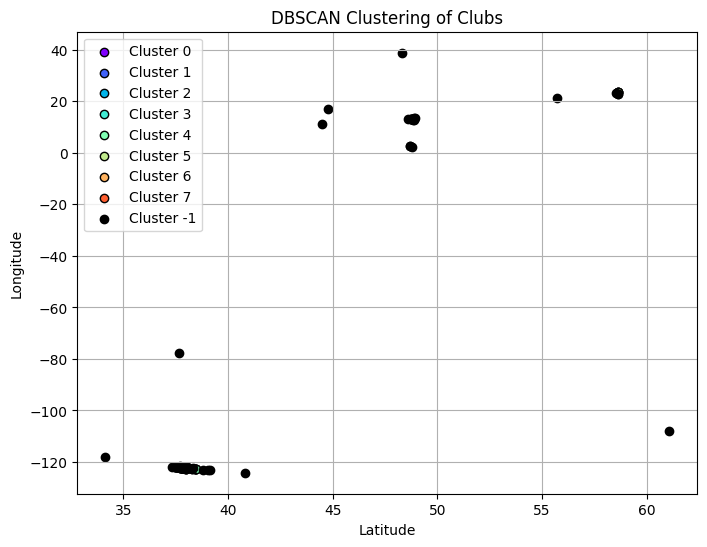

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Sample club locations (latitude, longitude)
club_locations = df_clubs[['Latitude', 'Longitude']]

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.05, min_samples=4)
labels = dbscan.fit_predict(club_locations)

df_clubs['Labels'] = labels
print(labels)

# Unique clusters
unique_labels = set(labels)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))

# Plot each cluster with different colors
plt.figure(figsize=(8, 6))
for cluster_label, color in zip(unique_labels, colors):
    if cluster_label == -1:
        color = 'black'  # Noise points
    cluster_points = df_clubs[df_clubs['Labels'] == cluster_label][['Latitude', 'Longitude']].values
    #cluster_points = df_clubs['Labels'] #club_locations[np.where(labels == labels)]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=[color], label=f'Cluster {cluster_label}', edgecolors='k')

plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("DBSCAN Clustering of Clubs")
plt.legend()
plt.grid()
plt.show()

In [ ]:
#Hierarchical DBSCAN
!pip install hdbscan

In [ ]:
import hdbscan

hdbscan_cluster = hdbscan.HDBSCAN(min_cluster_size=8,min_samples=4 )
labels = hdbscan_cluster.fit_predict(club_locations)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
df_clubs['Labels'] = labels
print(labels)

[ 5  5  3  5  4  5 -1  0 -1 -1  3 -1  6  0 -1  0  4  0 -1  0  3  1  4  3
  2  4  5  5  5  1  5  6  6  2 -1  4  0 -1  5  3  5  2 -1  5  4  0 -1 -1
 -1 -1 -1  6 -1  1  5  5 -1 -1  3  3 -1  6 -1 -1  5  3 -1  2  1  5  6  6
 -1  3  0 -1  5  6  4  0  6  0 -1  0 -1  2  1  1  2  2  1  2  0  1  5  0
  3 -1  6  6  3  4  5  5  5  4]


In [ ]:
import folium

# Create a Folium map centered at an average location
map_center = [df_clubs['Latitude'].median(), df_clubs['Longitude'].median()]
club_map = folium.Map(location=map_center, zoom_start=12)

# Define color palette
colors = ['darkblue', 'lightgreen', 'darkpurple', 'beige', 'pink', 'purple', 'black', 'lightgray','darkred','cadetblue']

# Add clubs to the map with color-coded clusters
for _, row in df_clubs.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Cluster {row['Club Number'], row['Club Name'], row['Labels']}",
        icon=folium.Icon(color=colors[int(row['Labels']) % len(colors)])
    ).add_to(club_map)

# Display the map
club_map

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

# Sample club data: Latitude, Longitude, and Membership Size
club_data = df_clubs[['Latitude', 'Longitude', 'Active Members']]

df_c = pd.DataFrame(club_data, columns=['Latitude', 'Longitude', 'Active Members'])

# Normalize membership size
scaler = MinMaxScaler()
df_c['Members_scaled'] = scaler.fit_transform(df_c[['Active Members']])

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.1,  min_samples=4)
df_c['Cluster'] = dbscan.fit_predict(df_c[['Latitude', 'Longitude', 'Members_scaled']])


print(df_c)

# Post-processing to enforce cluster size limits
from collections import Counter

cluster_counts = Counter(df_c['Cluster'])
for cluster_label, count in cluster_counts.items():
    if count < 4 or count > 6:
        # Reassign excess clubs to nearest valid cluster
        df_c.loc[df_c['Cluster'] == cluster_label, 'Cluster'] = -1  # Mark for reassignment

# Redistribute small/outlier clusters
valid_clusters = [c for c in cluster_counts if cluster_counts[c] >= 4 and cluster_counts[c] <=6]
for index, row in df_c[df_c['Cluster'] == -1].iterrows():
    nearest_cluster = min(valid_clusters, key=lambda c: np.linalg.norm(df_c[df_c['Cluster'] == c][['Latitude', 'Longitude']].values - row[['Latitude', 'Longitude']].values, axis=1).min())
    df_c.at[index, 'Cluster'] = nearest_cluster

print(df_c)


      Latitude   Longitude  Active Members  Members_scaled  Cluster
0    37.662713 -122.058351             8.0        0.186047       -1
1    37.769485 -122.248176            16.0        0.372093        0
2    37.663765 -121.876070            10.0        0.232558        1
3    37.838785 -122.194735            18.0        0.418605        0
4    37.974234 -122.033599            10.0        0.232558       -1
5    37.700434 -122.126548            14.0        0.325581        0
6    61.066692 -107.991707             8.0        0.186047       -1
7    48.720576   13.164717            19.0        0.441860       -1
8    38.049166 -122.159263             9.0        0.209302       -1
9    48.287534   38.861384            20.0        0.465116       -1
10   37.680392 -121.897905             9.0        0.209302        1
11   37.929373 -122.386329            11.0        0.255814       -1
12   37.501810 -121.974589            13.0        0.302326        2
13   48.715005   13.320016            24.0      

In [ ]:
df_c['Club Name'] = df_clubs['Club Name']
df_c['Club Number'] = df_clubs['Club Number']
df_c.head(10)

,Latitude,Longitude,Active Members,Members_scaled,Cluster,Club Name,Club Number
0,37.662713,-122.058351,8.0,0.186047,3,A Cut Above Club,8597
1,37.769485,-122.248176,16.0,0.372093,5,Alameda Tongue Twisters,1940417
2,37.663765,-121.876070,10.0,0.232558,1,Amador Valley Toastmasters Club,2452
3,37.838785,-122.194735,18.0,0.418605,5,Andeesheh Toastmasters Club,1150549
4,37.974234,-122.033599,10.0,0.232558,5,Argonauts,1809
5,37.700434,-122.126548,14.0,0.325581,3,Bayfair Toastmasters Club,207
6,61.066692,-107.991707,8.0,0.186047,4,Berkeley Bay,4976
7,48.720576,13.164717,19.0,0.441860,4,Bioradical Toastmasters Club,791318
8,38.049166,-122.159263,9.0,0.209302,5,Capitol Speakers Toastmasters Club,2080
9,48.287534,38.861384,20.0,0.465116,4,Castro Valley Toastmasters Club,961


In [ ]:
import folium

# Create a Folium map centered at an average location
map_center = [df_c['Latitude'].median(), df_c['Longitude'].median()]
club_map = folium.Map(location=map_center, zoom_start=12)

# Define color palette
colors = ['darkblue', 'lightgreen', 'darkpurple', 'beige', 'pink', 'purple', 'black', 'lightgray','darkred','cadetblue']

# Add clubs to the map with color-coded clusters
for _, row in df_c.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f" {row['Cluster'], row['Club Number'], row['Club Name'], row['Active Members']}",
        icon=folium.Icon(color=colors[int(row['Cluster']) % len(colors)])
    ).add_to(club_map)

# Display the map
club_map

In [ ]:
pd.set_option('display.max_rows', None)
df_c
df_c.to_csv('/content/df_c.csv')

In [ ]:
from uszipcode import ZipcodeSearchEngine

# Initialize search engine
search = SearchEngine()


# Get zip codes for a city
def get_zipcodes(city_name):
    state_name = 'CA'
    results = search.by_city_and_state(city_name, state_name)
    return [zipcode.zipcode for zipcode in results]

# Example usage
#city = "Pleasanton"
#state = "CA"
#zipcodes = get_zipcodes(city, state)
#print(f"Zip codes for {city}, {state}: {zipcodes}")

In [ ]:
!pip install zipcodes

In [ ]:
import zipcodes

# Get zip codes for a city
def get_zipcodes(city_name, state_name):
    results = zipcodes.filter_by(city=city_name, state=state_name)
    print(results)

    #return [zipcode['zip_code'] for zipcode in results]

# Example usage
city = "Pleasanton"
state = "CA"
zipcodes_list = get_zipcodes(city, state)
print(f"Zip codes for {city}, {state}: {zipcodes_list}")

In [ ]:
from geopy.geocoders import Nominatim

# Initialize Nominatim geocoder
geolocator = Nominatim(user_agent="geoapiExercises")

# Example ZIP Code
zip_code = "94578"

# Get location details
location = geolocator.geocode(zip_code)

# Extract latitude & longitude
if location:
    print(f"Latitude: {location.latitude}, Longitude: {location.longitude}")
else:
    print("Location not found")

In [ ]:
import pandas as pd

df = pd.DataFrame({'Zip': ['94578', '94101', '90210']})

def get_lat_lon(zip_code):
    location = geolocator.geocode(zip_code)
    return (location.latitude, location.longitude) if location else (None, None)

df[['Latitude', 'Longitude']] = df['Zip'].apply(get_lat_lon).apply(pd.Series)

print(df)

In [ ]:
X = df[['Latitude', 'Longitude']]  # Features

# Train K-Means for clustering (to determine groupings)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Train KNN classifier based on clusters
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, df['Cluster'])

In [ ]:
new_club = np.array([[37.72, -122.30]])  # New latitude & longitude
predicted_cluster = knn.predict(new_club)
print(f"New club belongs to Cluster: {predicted_cluster[0]}")

In [ ]:
citynms = df['City'].str.title().unique()
citynms

In [ ]:
state_name = 'CA'
#results = search.by_city_and_state(city_name, state_name)
cityzips = []
for city_name in citynms:
    cityzips.append((city_name,get_zipcodes(city_name, state_name)))

print(cityzips)

In [ ]:
df_cities = pd.DataFrame(cityzips, columns=['City', 'Zipcodes'])
df_cities

In [ ]:
df = df.merge(df_cities, on='City', how='left')
df.head(3)
df.explode('Zipcodes')
df.head(3)

In [ ]:
#Using KNN to group clubs based on proximity with City
from sklearn.neighbors import NearestNeighbors

In [ ]:
#Assign K to be 4
#Write model code
df_knn = df[['Club Number', 'Club Name', 'Latitude', 'Longitude']]

In [ ]:
import requests
from bs4 import BeautifulSoup

# URL of the page
#url = "https://d57tm.org/club/bayfair-toastmasters-club/"

def get_address(url):

  # Fetch the page content
  response = requests.get(url)
  soup = BeautifulSoup(response.text, "html.parser")

  # Extract address (modify based on actual HTML structure)
  address_divs = soup.find_all("div", class_="brxe-text-basic", id="brxe-qjarga")  # Adjust class if needed
  address = " ".join([div.get_text(strip=True).replace('Address: ', '') for div in address_divs[:2]])

  address_divs_zip = soup.find_all("div", class_="brxe-text-basic", id="brxe-nrlhhc")  # Adjust class if needed
  zip = " ".join([div.get_text(strip=True) for div in address_divs_zip[:2]])  # First two divs contain address

  return address +" "+ zip

url1 = "https://d57tm.org/club/Windmaster-Club/"
address = get_address(url1)
print(address)
  #print(f"Extracted Address: {address}, {zip}")

In [ ]:
clubNms = df1['Name'].str.replace(' ','-')
clubNms


In [ ]:
clubAddrs = []
for club in clubNms:
  url = f"https://d57tm.org/club/{club}/"
  address = get_address(url)
  clubAddrs.append(address)
print(clubAddrs)

In [ ]:
df_clubs['Club Name'] = pd.DataFrame(clubNms)
df_clubs['Address'] = clubAddrs
df_clubs.head(3)
#df_clubs['Club Name'] = df_clubs['Club Name'].str.replace('-',' ')
#df_clubs.head(3)


In [ ]:
df_clubs.head(4)
df_clubs['Street'] = df_clubs['Address'].apply(lambda x: x[0])
df_clubs['City'] = df_clubs['Address'].apply(lambda x: x[1])
df_clubs.head(4)
#df_clubs['State_ZIP'] = df3['State_ZIP

In [ ]:

df_clubs['Zip'] = df_clubs['City'].apply(lambda x: x.split(' ')[2] if len(x.split(' ')) > 2 else None)
df_clubs['State'] = df_clubs['City'].apply(lambda x: x.split(' ')[1] if len(x.split(' ')) > 1 else None)
df_clubs['City'] = df_clubs['City'].apply(lambda x: x.split(' ')[0] if len(x.split(' ')) > 0 else None)
df_clubs.head(4)

In [ ]:
df_clubs['City'] = df['City'].str.replace(",", "", regex=False)
df_clubs.head(4)

In [ ]:
df_clubs['Zip'].fillna(0, inplace=True)
df_clubs['Zip'] = df_clubs['Zip'].apply(lambda x: str(x).split("-")[0] if "-" in str(x) else x)
df_clubs.head(4)

In [ ]:
df_clubs['Street'].fillna('Virtual')
df_clubs['Street'] = df_clubs['Street'].apply(lambda x: str(x).split(":")[1] if ":" in str(x) else x)
df_clubs.drop(columns=['Address'], inplace=True)
df_clubs.head(4)
df_clubs= df_clubs.merge(df[['Active Members'], on = 'Club Name', how = 'left']


In [ ]:
df = df.merge(df_clubs, on='Club Name', how='left')
df.info()

In [ ]:
df_mdata = df[['Division', 'Area', 'Club Number', 'Club Name', 'Club Status', 'Active Members', 'Goals Met', 'Street', 'City', 'Zip']]
df_mdata